# Beschreibung des Datensets

Für die Bearbeitung der Aufgabe wurde sich für das Datenset Checkouts by title von der Seattle Public Library (SPL) entschieden. Dieses Datenset umfasst die monatlichen Daten der physischen und digitalen Ausleihen der Seattle Public Library, geordnet nach Titeln. Die erfassten Daten beginnen bei den Ausleihen, die im April 2005 stattfanden und erstrecken bis zum jeweils vergangenen Monat. Das Datenset wird monatlich aktualisiert und kann somit auch für sehr aktuelle Analysen genutzt werden, da die Daten des vergangenen Monates um den Zeitraum des 6. Tages des Folgemonats veröffentlicht werden. Zudem umfasst das Datenset nur die erste Ausleihe eines Mediums und berücksichtigt die Verlängerung der Ausleihdauer nicht als zweite Ausleihe. Das Datenset umfasst die Art des ausgeliehenen Mediums (digital oder physisch), das genutzte Ausleihtool (Overdrive, Horizon etc.), um welchen Medientypen es sich handelt (Buch, Magazin, Song etc.), Ausleihjahr und -monat, die Gesamtausleihen des Mediums während des Monats und die Informationen zum Medium selbst (Titel, Urheber, Thema, Herausgeber, Erscheinungsjahr).

# Fragestellungen

Es wurde sich für dieses Datenset entschieden, um die Ausleihen der Seattle Public Library zu analysieren und einzelne Aspekte zu visualisieren.

Fragestellungen:
-	Wie sieht die Verteilung der Ausleihen von digitalen und physischen Medien in der SPL aus?

Als erstes soll die Verteilung der Ausleihen von digitalen und physischen Medien betrachtet werden. Vor dem Hintergrund, dass in deutschen Bibliotheken digitale Ausleihen nur einen Bruchteil der Gesamtausleihen ausmachen, soll diese Aussage nun für die Ausleihen der SPL überprüft werden.
-	Wie hoch ist die durchschnittliche Ausleihanzahl für einen Titel in dem gewählten Monat?

An zweiter Stelle soll die durchschnittliche Anzahl der Ausleihen für ein Medium bestimmt werden. Um das Ergebnis besser interpretieren zu können, wird auch der Median der Ausleihanzahl bestimmt, da dieser von Ausreißern nach oben oder unten unbeeinflusst ist.
-	Wie sieht die Häufigkeitsverteilung der ausgeliehenen Medientypen aus?

An letzter Stelle soll die Häufigkeitsverteilung der ausgeliehenen Medientypen visualisiert werden. Anschließend an die erste Hypothese soll überprüft werden, welche physischen bzw. digitalen Medienarten am meisten ausgeliehen wurden. Da bei der Vorschau des Datensets bereits einige Einträge betrachtet werden konnte, wird davon ausgegangen, dass der physische Medientyp Buch die Verteilung dominieren wird. Diese Hypothese soll nun bestätigt bzw. widerlegt werden.

Dies sind die Ausgangsfragestellungen, die ggf. noch erweitert werden.


# Datenanalyse

Importieren der Packages Seaborn, Pandas und matplotlib

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importieren des benötigten Datensets Checkouts by Title der Seattle Public Library

In [5]:
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv"
spl = pd.read_csv(url)

In [6]:
spl

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,AUDIOBOOK,2015,8,2,Kissing Christmas Goodbye: Agatha Raisin Myste...,M.C. Beaton,"Fiction, Humor (Fiction), Mystery",Books on Tape,2009
1,Physical,Horizon,SOUNDDISC,2015,8,4,Run-DMC [sound recording] / Run-DMC.,Run-D.M.C. (Musical group),"Rap Music, Popular music 1981 1990","Arista/Legacy,",p2005.
2,Digital,Freegal,SONG,2015,8,1,Roots Reggae Music (feat. Don Carlos),Rebelution,NaN,NaN,NaN
3,Physical,Horizon,SOUNDDISC,2015,8,6,Treasure Island [sound recording] / Robert Lou...,"Stevenson, Robert Louis, 1850-1894","Buried treasure Fiction, Pirates Juvenile fict...","Random House/Listening Library,",p2007.
4,Physical,Horizon,BOOK,2015,8,1,Making sense of wine tasting : your essential ...,"Young, Alan",Wine tasting,"The Wine Appreciation Guild,",c2010.
...,...,...,...,...,...,...,...,...,...,...,...
995,Physical,Horizon,BOOK,2015,8,1,Boomsday : a novel / Christopher Buckley.,"Buckley, Christopher, 1952-","Baby boom generation Fiction, Humorous fiction","Warner Twelve,",2007.
996,Physical,Horizon,BOOK,2015,8,1,Wisdom wide and deep : a practical handbook fo...,"Catherine, Shaila",Meditation Buddhism,"Wisdom Publications,",c2011.
997,Digital,OverDrive,EBOOK,2015,8,1,Violet & Claire,Francesca Lia Block,Young Adult Fiction,HarperCollins Publishers Inc.,2008
998,Digital,Freegal,SONG,2015,8,1,La Recien Casada,Amparo De Las Jilguerillas Y Mercedes Castro,NaN,NaN,NaN


Nach dem erfolgreichen Importieren der Daten, wird nun die einzelne Spalte usageclass betrachtet, die Auskunft darüber liefert, ob es sich um eine physische oder digitale Ausleihe handelt.

In [7]:
spl["usageclass"]

0       Digital
1      Physical
2       Digital
3      Physical
4      Physical
         ...   
995    Physical
996    Physical
997     Digital
998     Digital
999    Physical
Name: usageclass, Length: 1000, dtype: object

In [8]:
type(spl.usageclass)

pandas.core.series.Series

Beschreibung der Spalte usageclass mit dem Attribut describe

In [9]:
spl.usageclass.describe()

count         1000
unique           2
top       Physical
freq           671
Name: usageclass, dtype: object

Darstellung der Spaltenauswertung mit einem Histogramm

<AxesSubplot:>

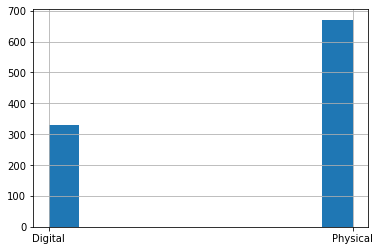

In [10]:
spl.usageclass.hist()

Diese Fragestellung konnte schneller als erwartet beantwortet werden, da describe die gesuchten Zahlen direkt ausgegeben hat. Wie erwartet wurde, dominieren die physischen Medien bei der Ausleihe mit 671 von 1000 Ausleihen. Die digitalen Ausleihen sind jedoch häufiger vertreten als zu Beginn der Aufgabe erwartet.

Berechnung der durchschnittlichen Ausleihanzahl

In [11]:
spl.checkouts.mean()

3.502

Über das Attribut konnte die durchschnittliche Ausleihanzahl berechnet werden, die bei aufgerundet 4 Ausleihe pro Medium liegt. In diesem Zuge könnte die Bestimmung des Medians von Interesse sein, da dieser nicht von Ausreißern beeinflusst ist.

In [12]:
spl.checkouts.median()

2.0

Der Median liegt nur bei 2 Ausleihen, demnach wurde die Hälfte der Medien mehr als zweimal ausgeliehen und die andere Hälfte weniger als zweimal ausgeliehen. Da der Median kleiner ist als der Durchschnitt, kann davon ausgegangen werden, es einige Medien gibt, die sehr häufig ausgeliehen wurden und so den Durchschnitt heben. 

Beschreibung des Spalteninhalts von materialtype, um die Häufigkeiten der Medientypen darzustellen

In [13]:
spl.materialtype.describe()

count     1000
unique      14
top       BOOK
freq       507
Name: materialtype, dtype: object

Wie bereits bei der Formulierung der Fragestellung erwartet, dominiert der Medientyp Buch die Ausleihen. In den folgenden Schritten soll nun die Häufigkeitsverteilung alle Medientypen mit Hilfe des Seaborn Packages und dem darin enthaltenen countplot ansprechend visualisiert werden

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='materialtype', ylabel='count'>

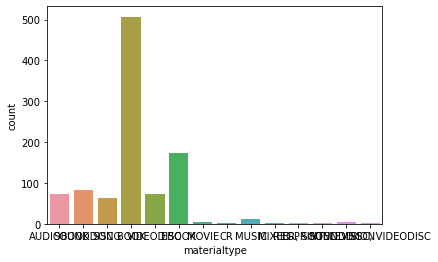

In [16]:
sns.countplot(spl.materialtype)

Da dieses Darstellung nicht ansprechend ist, wird im nächsten Schritt die Grafik von der x-Achse auf die y-Achse verlagert werden, sowie eine einheitliche Farbgebung implementiert werden

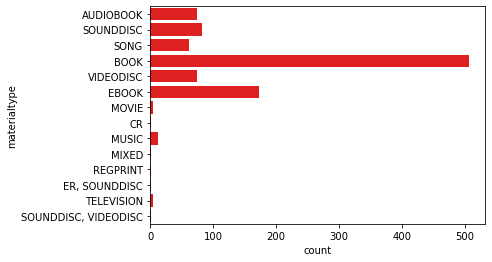

In [20]:
count_plot = sns.countplot(y= spl.materialtype, color="red")

Diese Grafik kann als ansprechend und zufriedenstellend angenommen werden, und bestätigt die zu Beginn formulierte Hypothese. Der Medientyp Buch dominiert die Ausleihen, an nächster Stelle folgt dann mit deutlichem Abstand der Medientyp Ebook. Am häufigsten werden demnach Bücher, sowohl in digitaler als auch physischer Form, ausgeliehen. Die Medientypen Hörbuch, Sound- und Videodisc, sowie Songs werden machen rund alle den gleichen Anteil der Ausleihen aus. Filme, Musik und TV machen mit jeweils sehr geringen Ausleihen nur einen sehr kleinen Anteil der Gesamtausleihen aus.  

# Diskussion

Insgesamt konnten die zu Beginn formulierten Fragestellungen und Hypothesen alle zufriedenstellend beantwortet, bestätigt oder visualisiert werden. 
Wie bereits vermutet machen physische Ausleihen den Großteil der Gesamtausleihen aus, wobei der Anteil an digitalen Ausleihen höher lag als erwartet. Zudem konnte durch die Berechnung und Vergleich von Durchschnitt und Median herausgestellt werden, dass es einige wenige Medien gibt, die überproportional oft ausgeliehen wurden und so den Durchschnitt künstlich heben. Auch bei der Häufigkeitsverteilung der ausgeliehenen Medientypen konnte die Ausgangshypothese bestätigt werden, da das physische Buch hier mit deutlichem Abstand vorne lag. Auf Grund der Tatsache, dass das digitale Buch, zwar deutlich hinter dem physischen Buch, aber immer noch weit vor den restlichen Medientypen liegt, lässt die den Rückschluss zu, dass die Nutzer einer Bibliothek in den meisten Fällen noch zum Standard-Medienangebot „Buch“ greifen, sich das jedoch auch langsam auf den digitalen Bereich ausweitet. 
